<a href="https://colab.research.google.com/github/RMartinod/Computer-Graphics-Using-Python/blob/main/Chapter15_Spline_curves_in_3D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Plotting the weight functions (B0, B1, and B2)**

(Text(0.5, 0, 'Parameter, u'), Text(0, 0.5, 'Blending weight, Bi(u)'), None)

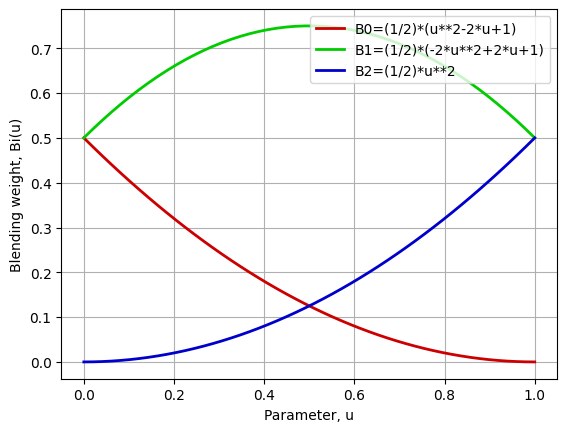

In [ ]:
import numpy as np, matplotlib.pyplot as plt
u = np.linspace(0,1,50)
B0 = (1/2)*(u**2-2*u+1)
B1 = (1/2)*(-2*u**2+2*u+1)
B2 = (1/2)*u**2
plt.plot(u,B0,color=[.8,0,0],linewidth=2,label='B0=(1/2)*(u**2-2*u+1)')
plt.plot(u,B1,color=[0,.8,0],linewidth=2,label='B1=(1/2)*(-2*u**2+2*u+1)')
plt.plot(u,B2,color=[0,0,.8],linewidth=2,label='B2=(1/2)*u**2')
plt.legend(loc='upper right')
plt.xlabel('Parameter, u'), plt.ylabel('Blending weight, Bi(u)'), plt.grid()

**Spline curve form 3 random control points in 3D**

In [ ]:
import numpy as np, plotly.express as px
Qk = np.random.rand(3,3)
u  = np.transpose(np.linspace(0,1,50).reshape(1, -1))
Uk = np.concatenate((u**2,u,np.ones(np.shape(u))),axis=1)
Mk = (1/2)*np.array([[ 1,-2, 1],
                     [-2, 2, 0],
                     [ 1, 1, 0]])
pu = Uk @ Mk @ Qk
fig = px.line_3d(x=Qk[:,0],y=Qk[:,1],z=Qk[:,2],line_dash=None,markers =True)
fig.add_trace(px.line_3d(x=pu[:,0],y=pu[:,1],z=pu[:,2]).data[0])
fig.update_traces(line_color='darkblue',line_width=4,marker_size=5)

**Plotting the weight functions (B0, B1, B2, and B3)**

(Text(0.5, 0, 'u'), Text(0, 0.5, 'Blending weight, Bi(u)'), None)

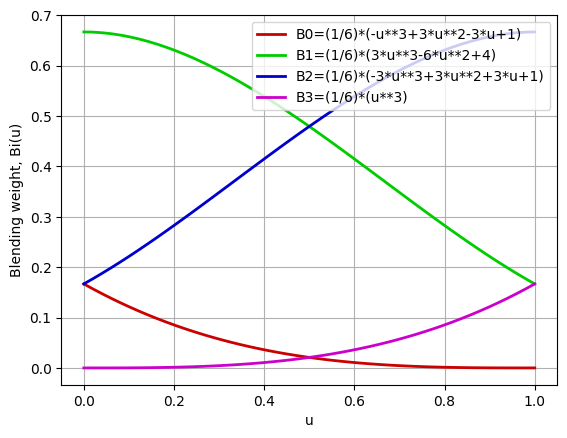

In [ ]:
import numpy as np, matplotlib.pyplot as plt
u = np.linspace(0,1,50)
B0 = (1/6)*(-u**3+3*u**2-3*u+1)
B1 = (1/6)*(3*u**3-6*u**2+4)
B2 = (1/6)*(-3*u**3+3*u**2+3*u+1)
B3 = (1/6)*(u**3)
plt.plot(u,B0,color=[.8,0,0],linewidth=2,label='B0=(1/6)*(-u**3+3*u**2-3*u+1)')
plt.plot(u,B1,color=[0,.8,0],linewidth=2,label='B1=(1/6)*(3*u**3-6*u**2+4)')
plt.plot(u,B2,color=[0,0,.8],linewidth=2,label='B2=(1/6)*(-3*u**3+3*u**2+3*u+1)')
plt.plot(u,B3,color=[.8,0,.8],linewidth=2,label='B3=(1/6)*(u**3)')
plt.legend(loc='upper right')
plt.xlabel('u'), plt.ylabel('Blending weight, Bi(u)'), plt.grid()

**Spline curve form 4 random control points in 3D**

In [ ]:
import numpy as np, plotly.express as px
Qk = np.random.rand(4,3)
u  = np.transpose(np.linspace(0,1,50).reshape(1, -1))
Uk = np.concatenate((u**3,u**2,u,np.ones(np.shape(u))),axis=1)
Mk = (1/6)*np.array([[-1, 3,-3, 1],
                     [ 3,-6, 3, 0],
                     [-3, 0, 3, 0],
                     [ 1, 4, 1, 0]])
pu = Uk @ Mk @ Qk
fig = px.line_3d(x=Qk[:,0],y=Qk[:,1],z=Qk[:,2],line_dash=None,markers =True)
fig.add_trace(px.line_3d(x=pu[:,0],y=pu[:,1],z=pu[:,2]).data[0])
fig.update_traces(line_color='darkblue',line_width=4,marker_size=5)

**Spline piecewise curve based on 3-control points**

In [ ]:
import numpy as np, plotly.express as px
Qk = np.random.rand(7,3)
u  = np.transpose(np.linspace(0,1,20).reshape(1, -1))
Uk = np.concatenate((u**2,u,np.ones(np.shape(u))),axis=1)
Mk = (1/2)*np.array([[ 1,-2, 1], [-2, 2, 0], [ 1, 1, 0]])
pu = np.zeros((len(u)*(len(Qk)-len(Mk)+1),3))
for i in range (len(Qk)-len(Mk)+1):
  QkStage = Qk[i:i+len(Mk),:]
  puStage = Uk @ Mk @ QkStage
  pu[len(u)*i:len(u)*(i+1),0:3] = puStage
fig = px.line_3d(x=Qk[:,0],y=Qk[:,1],z=Qk[:,2],line_dash=None,markers =True)
fig.add_trace(px.line_3d(x=pu[:,0],y=pu[:,1],z=pu[:,2]).data[0])
fig.update_traces(line_color='darkblue',line_width=4,marker_size=5)

**Closed spline curve form 7 randoms points in 3D**

In [ ]:
import numpy as np, plotly.express as px
Qk = np.random.rand(7,3)
p0 = np.array([Qk[0,0],Qk[0,1],Qk[0,2]]).reshape(1,-1)
p1 = np.array([Qk[1,0],Qk[1,1],Qk[1,2]]).reshape(1,-1)
Qk = np.concatenate((Qk,p0,p1))
u  = np.transpose(np.linspace(0,1,20).reshape(1, -1))
Uk = np.concatenate((u**2,u,np.ones(np.shape(u))),axis=1)
Mk = (1/2)*np.array([[ 1,-2, 1], [-2, 2, 0], [ 1, 1, 0]])
pu = np.zeros((len(u)*(len(Qk)-len(Mk)+1),3))
for i in range (len(Qk)-len(Mk)+1):
  QkStage = Qk[i:i+len(Mk),:]
  puStage = Uk @ Mk @ QkStage
  pu[len(u)*i:len(u)*(i+1),0:3] = puStage
fig = px.line_3d(x=Qk[:,0],y=Qk[:,1],z=Qk[:,2],line_dash=None,markers =True)
fig.add_trace(px.line_3d(x=pu[:,0],y=pu[:,1],z=pu[:,2]).data[0])
fig.update_traces(line_color='darkblue',line_width=4,marker_size=5)

**Quick project**

The magnetosphere is the region surrounding a planet where its magnetic field dominates. While other planets in our solar system have magnetospheres, Earth's stands out as the strongest among the rocky planets. This vast, comet-shaped magnetic bubble has been critical to Earth's habitability, protecting life by shielding the planet from harmful solar and cosmic particle radiation and preventing atmospheric erosion caused by the solar wind—a continuous stream of charged particles emitted by the Sun.

Earth's magnetosphere is part of a dynamic, interconnected system influenced by solar, planetary, and interstellar conditions. It is generated deep within Earth's outer core by the convective motion of charged, molten iron. The solar wind compresses the sun-facing side of the magnetosphere, or dayside, reducing its size to about six to ten Earth radii. On the opposite side, the nightside extends into a vast magnetotail, which fluctuates in length and can stretch hundreds of Earth radii—far beyond the Moon's orbit at 60 Earth radii


In [ ]:
import numpy as np, plotly.express as px
X = [0.8392, 51.993, 118.227, 118.227, 51.993, 0.8392, 0.2656, 16.613, 38.316, 38.316,
     16.613, 0.2656, -0.288, -18.328, -43.381, -43.381, -18.328, -0.288, -0.3261, -21.096,
    -51.092, -51.092, -21.096, -0.3261, -0.288, -18.328, -43.381, -43.381, -18.328,
    -0.288, 0.2656, 16.613, 38.316, 38.316, 16.613, 0.2656]
Y = [0, 0, 0, 0, 0, 0, 0.5817, 3.6377, 8.3901, 8.3901, 3.6377, 0.5817, 0.3323, 2.1152,
     5.0064, 5.0064, 2.1152, 0.3323, -0.0957, -0.6194, -1.5002, -1.5002, -0.6194, -0.0957,
     -0.3323, -2.1152, -5.0064, -5.0064, -2.1152, -0.3323, -0.5817, -3.6377, -8.3901,
     -8.3901, -3.6377, -0.5817]
Z = [-0.7106, -1, -0.7792, 0.7792, 1, 0.7106, -0.7046, -1, -0.7904, 0.7904, 1, 0.7046,
     -0.6936, -1, -0.811, 0.811, 1, 0.6936, -0.6836, -1, -0.8296, 0.8296, 1, 0.6836,
     -0.6936, -1, -0.811, 0.811, 1, 0.6936, -0.7046, -1, -0.7904, 0.7904, 1, 0.7046]
Qk = np.concatenate((np.array([X,]).reshape(-1,1),np.array([Y]).reshape(-1,1),np.array([Z]).reshape(-1,1)), axis=1)
p0 = np.array([X[0],Y[0],Z[0]]).reshape(1,-1)
p1 = np.array([X[1],Y[1],Z[1]]).reshape(1,-1)
p2 = np.array([X[2],Y[2],Z[2]]).reshape(1,-1)
Qk = np.concatenate((Qk,p0,p1,p2))
u  = np.transpose(np.linspace(0,1,20).reshape(1, -1))
Uk = np.concatenate((u**3,u**2,u,np.ones(np.shape(u))),axis=1)
Mk = (1/6)*np.array([[-1, 3,-3, 1],[ 3,-6, 3, 0],[-3, 0, 3, 0],[ 1, 4, 1, 0]])
pu = np.zeros((len(u)*(len(Qk)-len(Mk)+1),3))
for i in range (len(Qk)-len(Mk)+1):
  QkStage = Qk[i:i+len(Mk),:]
  puStage = Uk @ Mk @ QkStage
  pu[len(u)*i:len(u)*(i+1),0:3] = puStage
fig = px.line_3d(x=Qk[:,0],y=Qk[:,1],z=Qk[:,2],line_dash=None,markers =True)
fig.add_trace(px.line_3d(x=pu[:,0],y=pu[:,1],z=pu[:,2]).data[0])
fig.update_traces(line_color='darkred',line_width=4,marker_size=5)
fig.update_layout(scene = dict(aspectratio = dict(x=3, y=1, z=.5)))